In [55]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [56]:
df = web.DataReader('AMZN', data_source='yahoo',start='2012-01-01', end='2022-02-16')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2022-02-10,3214.330078,3155.000000,3167.000000,3180.070068,3413400,3180.070068
2022-02-11,3180.000000,3054.679932,3162.689941,3065.870117,3851600,3065.870117
2022-02-14,3168.969971,3033.000000,3035.020020,3103.340088,4022000,3103.340088


In [144]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.82)
training_data_len

2091

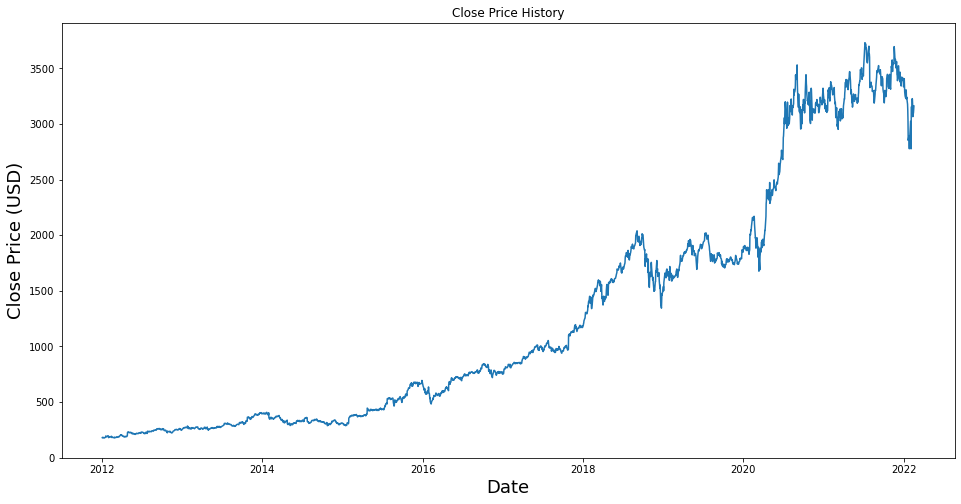

In [145]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [146]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.71895264e-04],
       [4.44384968e-04],
       [4.72512283e-04],
       ...,
       [8.23351604e-01],
       [8.30908917e-01],
       [8.39852871e-01]])

In [147]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
       0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
       0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
       0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
       0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
       0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
       0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
       0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609])]
[0.008066423825883726]



In [148]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [149]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(2031, 60, 1)

In [150]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [151]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [152]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2031/2031 [==============================] - 65s 30ms/step - loss: 5.6062e-04


In [153]:
test_data = scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [154]:
x_test = np.array(x_test)

In [155]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [156]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [157]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

69.40416734187363

C:\Users\kapoo\AppData\Local\Temp/ipykernel_8448/2133332622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


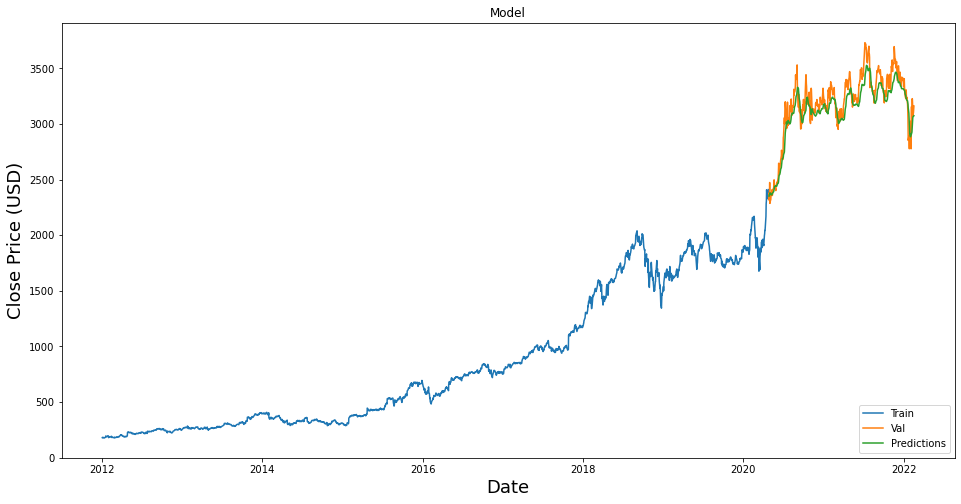

In [158]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [159]:
valid

,Close,Predictions
Date,,
2020-04-27,2376.000000,2351.597412
2020-04-28,2314.080078,2363.472656
2020-04-29,2372.709961,2364.826660
2020-04-30,2474.000000,2367.523926
2020-05-01,2286.040039,2380.809570
...,...,...
2022-02-10,3180.070068,3034.195557
2022-02-11,3065.870117,3061.802734
2022-02-14,3103.340088,3069.773438


In [160]:
amzn_quote = web.DataReader('AMZN', data_source='yahoo',start='2012-01-01', end='2022-02-16')
new_df = amzn_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3078.9282]]


In [161]:
amzn_quote2 = web.DataReader('AMZN', data_source='yahoo',start='2012-01-01', end='2022-02-16')
print(amzn_quote2['Close'])

Date
2012-01-03     179.029999
2012-01-04     177.509995
2012-01-05     177.610001
2012-01-06     182.610001
2012-01-09     178.559998
                 ...     
2022-02-10    3180.070068
2022-02-11    3065.870117
2022-02-14    3103.340088
2022-02-15    3130.209961
2022-02-16    3162.010010
Name: Close, Length: 2549, dtype: float64
